In [ ]:
# import the necessary libraries
import math #不需要，因为后面nrows直接输入了
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

##Load the MNIST dataset from Keras.
1.Prompt the user "How many rows of training images would you like to review?" and output corresponding number of rows with ten images on each row.

2.Use (in_train, out_train) for both training and validation to model neural network in Keras:

3..Do not change the optimizer, the learning rate, nor the loss function.

3.2Improve the accuracies by adding number of units, adding more layers, changing activation functions, changing the batch size, changing the epochs=10, and/or changing the validation split.

4.Compare and report at least five sets of settings.

5.On your setting with the highest accuracies, report other performance metrics.

6.Prompt the user "How many rows of testing images would you like to review?" and output corresponding number of rows with ten images on each row. 

7.Improve the browser application, and write at least five comments to explain the code.

In [ ]:
# displays output inline
%matplotlib inline

#Data Preprocessing

In [ ]:
mnist = keras.datasets.mnist
(in_train, out_train), (in_test, out_test) = mnist.load_data()

In [ ]:
in_train.shape, in_test.shape, np.unique(out_train)

((60000, 28, 28),
 (10000, 28, 28),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [ ]:
# scale the values between 0 and 1 for both training and validation sets
in_train = in_train / 255.0
in_test = in_test / 255.0

In [ ]:
# use digitMNIST dataset published by Zalando Research
digit_mnist = tf.keras.datasets.mnist.load_data(path="mnist.npz")
(in_train, out_train), (in_test, out_test) = digit_mnist

In [ ]:
# 60,000 training images, each image is a grayscale image with size 28x28 pixels
# 10,000 testing images, each image is a grayscale image with size 28x28 pixels
# 10 total categories and each label is assigned a number between 0 and 9
in_train.shape, in_test.shape, np.unique(out_train)

((60000, 28, 28),
 (10000, 28, 28),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [ ]:
# scale the values between 0 and 1 for both training and validation sets
in_train = in_train / 255.0
in_test = in_test / 255.0

In [ ]:
#对于0-10的数字不需要这段代码
# define ten categories from 0 to 9
class_names = {index:cn for index, cn in enumerate(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])}

#Training Set

How many rows of images would you like to review? 2


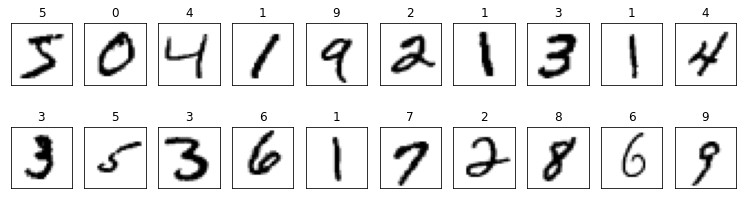

In [ ]:
#Prompt the user "How many rows of training images would you like to review?" and output corresponding number of rows with ten images on each row.
n_cols = 10
n_rows = int(input("How many rows of images would you like to review? "))# enter the row you want
def plot(images, labels, predictions=None):
    # create a grid with 10 columns
    i=1
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols + 3, n_rows + 1.5))#格子之间的距离
    if predictions is None:
        predictions = [None] * len(labels)
    for index, (x, y_true, y_pred) in enumerate(zip(images, labels, predictions)):
      if i <= n_cols*n_rows: #run only if index <= row* 10 columns
        i=i+1
        ax = axes.flat[index]
        ax.imshow(x, cmap=plt.cm.binary)
        ax.set_title(y_true)
        if y_pred is not None:
            ax.set_xlabel(class_names[y_pred])
        ax.set_xticks([])
        ax.set_yticks([])

# plot images
plot(in_train[:(n_rows*n_cols)], out_train[:((n_rows*n_cols))])   

#Model in Keras

In [ ]:
#set random seed for valid split
tf.random.set_seed(20742)
#adding number of units, adding more layers, changing activation functions, changing the batch size, changing the epochs=10, and/or changing the validation split.
model = keras.Sequential(layers=[
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),#sigmaid,tanh, larger than128 better
    keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(in_train, out_train, batch_size=60, epochs=10, validation_split=0.2) #epochs larger the better,batch_size smaller the better
#batch最好是output的因数

Epoch 1/10
800/800 [==============================] - 3s 3ms/step - loss: 0.3263 - accuracy: 0.9097 - val_loss: 0.1697 - val_accuracy: 0.9517
Epoch 2/10
800/800 [==============================] - 2s 3ms/step - loss: 0.1480 - accuracy: 0.9566 - val_loss: 0.1244 - val_accuracy: 0.9641
Epoch 3/10
800/800 [==============================] - 2s 3ms/step - loss: 0.1016 - accuracy: 0.9701 - val_loss: 0.1081 - val_accuracy: 0.9687
Epoch 4/10
800/800 [==============================] - 2s 3ms/step - loss: 0.0744 - accuracy: 0.9781 - val_loss: 0.0997 - val_accuracy: 0.9707
Epoch 5/10
800/800 [==============================] - 2s 3ms/step - loss: 0.0604 - accuracy: 0.9820 - val_loss: 0.0949 - val_accuracy: 0.9723
Epoch 6/10
800/800 [==============================] - 2s 3ms/step - loss: 0.0471 - accuracy: 0.9863 - val_loss: 0.0896 - val_accuracy: 0.9730
Epoch 7/10
800/800 [==============================] - 2s 3ms/step - loss: 0.0386 - accuracy: 0.9889 - val_loss: 0.0955 - val_accuracy: 0.9716
Epoch 

In [ ]:
#set random seed for valid split
tf.random.set_seed(20742)
model2 = keras.Sequential(layers=[
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model2.fit(in_train, out_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 2.3014 - accuracy: 0.1135 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3006 - accuracy: 0.1140 - val_loss: 2.3015 - val_accuracy: 0.1060
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 2.2996 - accuracy: 0.1140 - val_loss: 2.3005 - val_accuracy: 0.1060
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 2.2963 - accuracy: 0.1151 - val_loss: 2.2944 - val_accuracy: 0.1074
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 2.2891 - accuracy: 0.1262 - val_loss: 2.2838 - val_accuracy: 0.1252
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 2.2737 - accuracy: 0.1588 - val_loss: 2.2641 - val_accuracy: 0.1610
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 2.2493 - accuracy: 0.1928 - val_loss: 2.2344 - val_accuracy:

In [ ]:
#set random seed for valid split
tf.random.set_seed(20742)
model3 = keras.Sequential(layers=[
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model3.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model3.fit(in_train, out_train, batch_size=30, epochs=10, validation_split=0.2)

Epoch 1/10
1600/1600 [==============================] - 5s 3ms/step - loss: 2.3013 - accuracy: 0.1135 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 2/10
1600/1600 [==============================] - 4s 3ms/step - loss: 2.3008 - accuracy: 0.1140 - val_loss: 2.3011 - val_accuracy: 0.1060
Epoch 3/10
1600/1600 [==============================] - 4s 3ms/step - loss: 2.2996 - accuracy: 0.1140 - val_loss: 2.3000 - val_accuracy: 0.1060
Epoch 4/10
1600/1600 [==============================] - 5s 3ms/step - loss: 2.2968 - accuracy: 0.1140 - val_loss: 2.2957 - val_accuracy: 0.1060
Epoch 5/10
1600/1600 [==============================] - 6s 4ms/step - loss: 2.2904 - accuracy: 0.1202 - val_loss: 2.2860 - val_accuracy: 0.1382
Epoch 6/10
1600/1600 [==============================] - 6s 4ms/step - loss: 2.2778 - accuracy: 0.1497 - val_loss: 2.2708 - val_accuracy: 0.1297
Epoch 7/10
1600/1600 [==============================] - 5s 3ms/step - loss: 2.2576 - accuracy: 0.1862 - val_loss: 2.2463 - val_accuracy:

In [ ]:
#set random seed for valid split
tf.random.set_seed(20742)
model4 = keras.Sequential(layers=[
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model4.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model4.fit(in_train, out_train, batch_size=60, epochs=15, validation_split=0.2)

Epoch 1/15
800/800 [==============================] - 3s 3ms/step - loss: 0.3263 - accuracy: 0.9097 - val_loss: 0.1697 - val_accuracy: 0.9517
Epoch 2/15
800/800 [==============================] - 2s 3ms/step - loss: 0.1480 - accuracy: 0.9566 - val_loss: 0.1244 - val_accuracy: 0.9641
Epoch 3/15
800/800 [==============================] - 3s 3ms/step - loss: 0.1015 - accuracy: 0.9702 - val_loss: 0.1077 - val_accuracy: 0.9686
Epoch 4/15
800/800 [==============================] - 3s 4ms/step - loss: 0.0745 - accuracy: 0.9778 - val_loss: 0.0994 - val_accuracy: 0.9711
Epoch 5/15
800/800 [==============================] - 4s 5ms/step - loss: 0.0604 - accuracy: 0.9819 - val_loss: 0.0940 - val_accuracy: 0.9728
Epoch 6/15
800/800 [==============================] - 4s 5ms/step - loss: 0.0469 - accuracy: 0.9860 - val_loss: 0.0917 - val_accuracy: 0.9732
Epoch 7/15
800/800 [==============================] - 3s 4ms/step - loss: 0.0382 - accuracy: 0.9892 - val_loss: 0.0943 - val_accuracy: 0.9724
Epoch 

In [ ]:
#set random seed for valid split
tf.random.set_seed(20742)
model5 = keras.Sequential(layers=[
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="softmax"),
    keras.layers.Dense(10, activation="sigmoid")#change activation
])
model5.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
pre_train=model5.fit(in_train, out_train, batch_size=60, epochs=10, validation_split=0.2)

Epoch 1/10
800/800 [==============================] - 3s 3ms/step - loss: 2.3015 - accuracy: 0.1120 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 2/10
800/800 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1140 - val_loss: 2.3022 - val_accuracy: 0.1060
Epoch 3/10
800/800 [==============================] - 2s 3ms/step - loss: 2.3012 - accuracy: 0.1140 - val_loss: 2.3023 - val_accuracy: 0.1060
Epoch 4/10
800/800 [==============================] - 3s 3ms/step - loss: 2.3012 - accuracy: 0.1140 - val_loss: 2.3023 - val_accuracy: 0.1060
Epoch 5/10
800/800 [==============================] - 2s 3ms/step - loss: 2.3012 - accuracy: 0.1140 - val_loss: 2.3022 - val_accuracy: 0.1060
Epoch 6/10
800/800 [==============================] - 2s 3ms/step - loss: 2.3012 - accuracy: 0.1140 - val_loss: 2.3024 - val_accuracy: 0.1060
Epoch 7/10
800/800 [==============================] - 2s 3ms/step - loss: 2.3012 - accuracy: 0.1140 - val_loss: 2.3023 - val_accuracy: 0.1060
Epoch 

In [ ]:
loss, accuracy = model4.evaluate(in_train, out_train)#model4 has the best result. 

1875/1875 [==============================] - 5s 2ms/step - loss: 0.0368 - accuracy: 0.9901


In [ ]:
#More performance metrics
model4.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['MeanSquaredError',
       ])
pre_train=model4.fit(in_train, out_train, batch_size=60, epochs=10, validation_split=0.2)


Epoch 1/10
800/800 [==============================] - 3s 4ms/step - loss: 0.0316 - mean_squared_error: 27.3786 - val_loss: 0.0770 - val_mean_squared_error: 27.4452
Epoch 2/10
800/800 [==============================] - 3s 3ms/step - loss: 0.0262 - mean_squared_error: 27.3789 - val_loss: 0.0726 - val_mean_squared_error: 27.4454
Epoch 3/10
800/800 [==============================] - 3s 3ms/step - loss: 0.0209 - mean_squared_error: 27.3792 - val_loss: 0.0819 - val_mean_squared_error: 27.4456
Epoch 4/10
800/800 [==============================] - 3s 3ms/step - loss: 0.0182 - mean_squared_error: 27.3794 - val_loss: 0.0883 - val_mean_squared_error: 27.4457
Epoch 5/10
800/800 [==============================] - 3s 3ms/step - loss: 0.0164 - mean_squared_error: 27.3795 - val_loss: 0.0857 - val_mean_squared_error: 27.4459
Epoch 6/10
800/800 [==============================] - 3s 4ms/step - loss: 0.0149 - mean_squared_error: 27.3796 - val_loss: 0.0914 - val_mean_squared_error: 27.4458
Epoch 7/10
800/8

In [ ]:
MeanSquaredError = model4.evaluate(in_train, out_train)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0225 - mean_squared_error: 27.3935


#Validation Set

In [ ]:
# predict the validation set
preds = model4.predict(in_test).argsort()[:,-1]
print(preds)
probs = model.predict(in_test)
print(probs.argmax(axis=1))#the same result

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


How many rows of images would you like to review??4


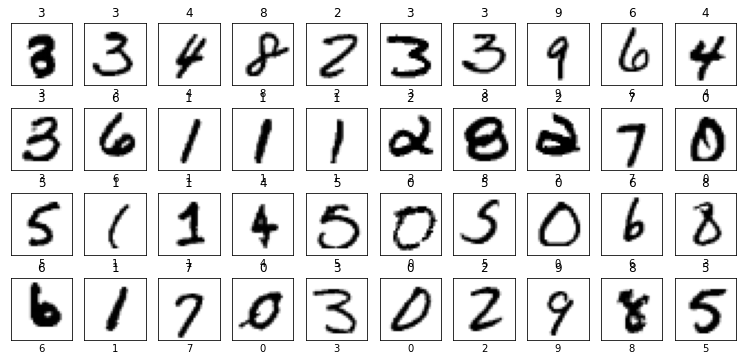

In [ ]:
n_cols = 10
n_rows = int(input("How many rows of images would you like to review? "))# enter the row you want
rand_idxs = np.random.permutation(len(in_test))
plot(in_test[rand_idxs], out_test[rand_idxs], preds[rand_idxs])

#Application

interactive(children=(IntSlider(value=0, description='Image index', max=9999), Output()), _dom_classes=('widge…

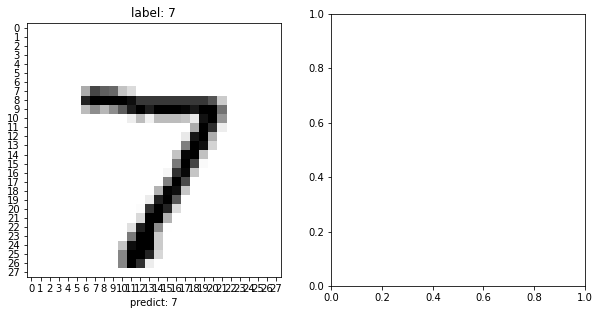

In [ ]:
from ipywidgets import interact, widgets, Layout
img_idx_slider = widgets.IntSlider(value=0, min=0, max=len(in_test) - 1, description="Image index",layout=Layout(widgets=100))
@interact(index=img_idx_slider)
def visualize_prediction(index=0):
    fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(in_test[index], cmap=plt.cm.binary)
    ax1.set_title("label: %s" % out_test[index])
    ax1.set_xlabel("predict: %s" % preds[index])
    ax1.set_xticks(np.arange(28))
    ax1.set_yticks(np.arange(28))
    ax1.xaxis_ticks_top()
    ax1.ticks_params(axis='x',rotation=90)
    ax1.tick_params(axis='x', colors='white') #Add white label to x axis 
    ax1.axes.get_yaxis().set_visible(False) #Not show the y axis
    ax2.bar(x=[index for index in range(10)], height=probs[index]*100)
    ax2.set_ylim(0.100)
    ax2.set_xticks(np.arange(10))
    ax2.set_xlabel("Class of Number")#Add label text to x axis
    ax2.set_ylabel("Probability%")#Add label text to y axis
    ax2.set_title("Prob of each class")#Add title to right plot